Как обычно, первым делом подключаем все необходимые библиотеки:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas
import math
%matplotlib inline

Нам известно, что оценкой  максимального правдоподобия для $\theta$ в модели $N \sim (\theta, 1)$ является $\bar{X}$, также являющаяся асимптотически нормальной.Сопряженным априорным распределением к нашему будет $N \sim (\mu_0, \sigma_0^2)$. Гиперпараметрами апостериорного распределения будут: $\mu = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}$.
Если мы используем квадратичную функцию потерь $g(x,y) = (x-y)^2$, то байесовской оценкой параметра $\theta$ будет УМО $\hat{\theta} = E(\theta|X)$. Будем искать это УМО. Зная, что апостериорное распределение $\sim N(\mu, \sigma^2)$, а апостериорная плотность - это ни что иное, как $p(\theta|X)$, легко находим, что $\hat{\theta} = E(\theta|X) = \mu = \frac{\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n X_i}{\sigma^2}}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}$. Зададим значения параметров $\mu$ и $\sigma$ из условия задачи:

In [2]:
mu_values = [0, 0, 10, 10]
sigma_values = [1, 100, 1, 100]

Зададим функцию, которая считает значения оценки $\hat{\theta}$ в зависимости от параметров априорного распределения $\mu_0$ и $\sigma_0$:

In [3]:
def theta_evaluation(mu, sigma, selection, const_sigma = 1):
    cumulative_sum = np.cumsum(selection)
    theta_evals = []
    for i in range(100):
        theta_evals.append(abs((float(mu) / float(sigma ** 2) + float(cumulative_sum[i]) / float(const_sigma ** 2)) / \
                            (1. / float(sigma ** 2) + float(i + 1) / float(const_sigma ** 2))))
    return theta_evals

Теперь определяем функции, которые считает уже непосредственно сами байесовские оценки и оценку максимального правдоподобия:

In [4]:
def mean_evaluation():
    sample = sps.norm.rvs(size=100)
    cum_sums = np.cumsum(sample)
    mean_values = cum_sums
    for i in range(100) :
        mean_values[i] = abs(mean_values[i] / (i + 1))
    return mean_values

In [5]:
def bayesian_evaluation(mu_value, sigma_value):
    sample = sps.norm.rvs(size=100)
    bayesian_evaluation = theta_evaluation(mu_value, sigma_value, sample)
    return bayesian_evaluation

Считаем наши оценки:

In [6]:
means = mean_evaluation()
bayesian_evals = []
for i in range(len(mu_values)):
    bayesian_evals.append(bayesian_evaluation(mu_values[i], sigma_values[i]))

Следующим шагом определяем функцию, которая будет строить графики абсолютной величины отклонения оценки от истинного значения параметра в зависимости от n для оценки максимального правдоподобия и байесовских оценок, которым соответствуют разные значения параметров априорного распределения:

In [7]:
def build_plots(means, bayesian_evals):
    points = range(1,101)
    plt.figure(figsize=(20, 10))
    plt.plot(points, means, '--', label='Maximum likelyhood evaluation')
    for i in range(len(bayesian_evals)):
        plt.plot(points, bayesian_evals[i], label='parametrs = ' + str(mu_values[i]) + ', ' + str(sigma_values[i]))
        plt.ylim(0,2)
    plt.legend()
    plt.show()

Строим на одном графике оценку максимального правдоподобия и байесовские оценки для различных значений параметров $\mu$ и $\theta$:

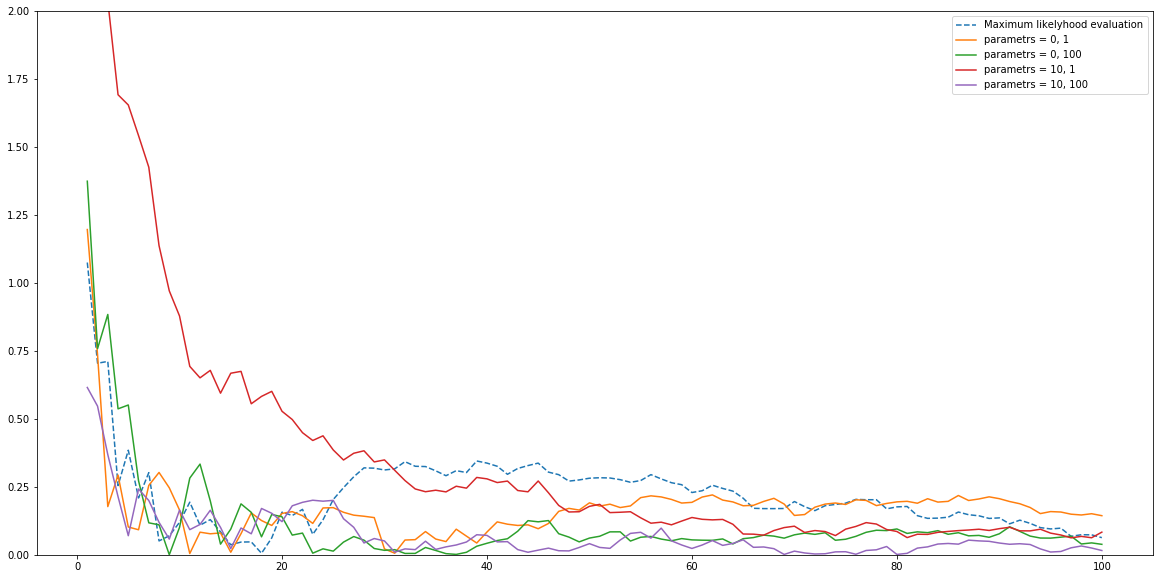

In [8]:
build_plots(means, bayesian_evals)

Судя по графикам, можно сказать, что набор параметров (10,1) ведёт себя хуже всего.

Проводим аналогичные исследования для модели $N(0,\theta)$. В этом случае берём следующие значения параметров $\alpha$ и $\lambda$:

In [9]:
alpha_values = [1, 1, 10, 10]
lambda_values = [1, 100, 1, 100]

Для данной модели априорное распределение будет из семейства, обратного к Гамма распределению $\sim Г_{inv}(\alpha + \frac{n}{2}, \frac{2\lambda + \sum_{i=1}^nX_i^2}{2}) = Г_{inv}(a,b)$. Так как обратное Гамма распределение имеет матожидание равное $\frac{b}{a-1}$, то $\hat{\theta} = E(\theta|X) = \frac{2\lambda + \sum_{i=1}^nX_i^2}{2\alpha + n - 2}$. Оценкой максимального правдоподобия параметра $\theta$ будет выборочная дисперсия $S^2 = \bar{X^2} - \bar{X}^2$.

Зададим функцию, которая считает значения оценки $\hat{\theta}$ в зависимости от параметров априорного распределения $\alpha$ и $\lambda$:

In [10]:
def theta_evaluation_new(alpha_value, lambda_value, selection):
    squared_sum = np.cumsum(selection ** 2)
    theta_evals = []
    for i in range(100):
        theta_evals.append(abs((float(2. * float(lambda_value) + float(squared_sum[i])) / \
                                (2. * float(alpha_value) + i - 1.))))
    return theta_evals

Задаём функции, которые будут считать ОМП и байесовские оценки:

In [11]:
def sample_variance_evaluation():
    sample_variance_evals = []
    sample = sps.norm.rvs(size=100)
    cum_sums = np.cumsum(sample)
    mean_sums = cum_sums
    squared_sums = cum_sums ** 2
    for i in range(100) :
        mean_sums[i] = abs(float(mean_sums[i] / (i + 1.)))
    for i in range(100):
        squared_sums[i] = abs(float(squared_sums[i]) / (i + 1.))
    for i in range(100):
        sample_variance_evals.append(abs(float(squared_sums[i] - mean_sums[i] ** 2)))
    return sample_variance_evals

In [12]:
def bayesian_evaluation_new(alpha_value, lambda_value):
    sample = sps.norm.rvs(size=100)
    bayesian_evaluations_new = theta_evaluation_new(alpha_value, lambda_value, sample)
    return bayesian_evaluations_new

Считаем наши оценки в зависимости от значений $\alpha$ и $\lambda$:

In [13]:
sample_variance_evals = sample_variance_evaluation()
bayesian_evals_new = []
for i in range(len(alpha_values)):
    bayesian_evals_new.append(bayesian_evaluation_new(alpha_values[i], lambda_values[i]))

Строим на одном графике оценку максимального правдоподобия и байесовские оценки для различных значений параметров $\alpha$  и  $\lambda$ :

In [14]:
def build_plots_new(variance_evals, bayesian_evals):
    points = range(1,101)
    plt.figure(figsize=(20, 10))
    plt.plot(points, variance_evals, '--', label='Maximum likelyhood evaluation')
    for i in range(len(bayesian_evals)):
        plt.plot(points, bayesian_evals[i], label='parametrs = ' + str(alpha_values[i]) + ', ' + str(lambda_values[i]))
        plt.ylim(0,4)
    plt.legend()
    plt.show()

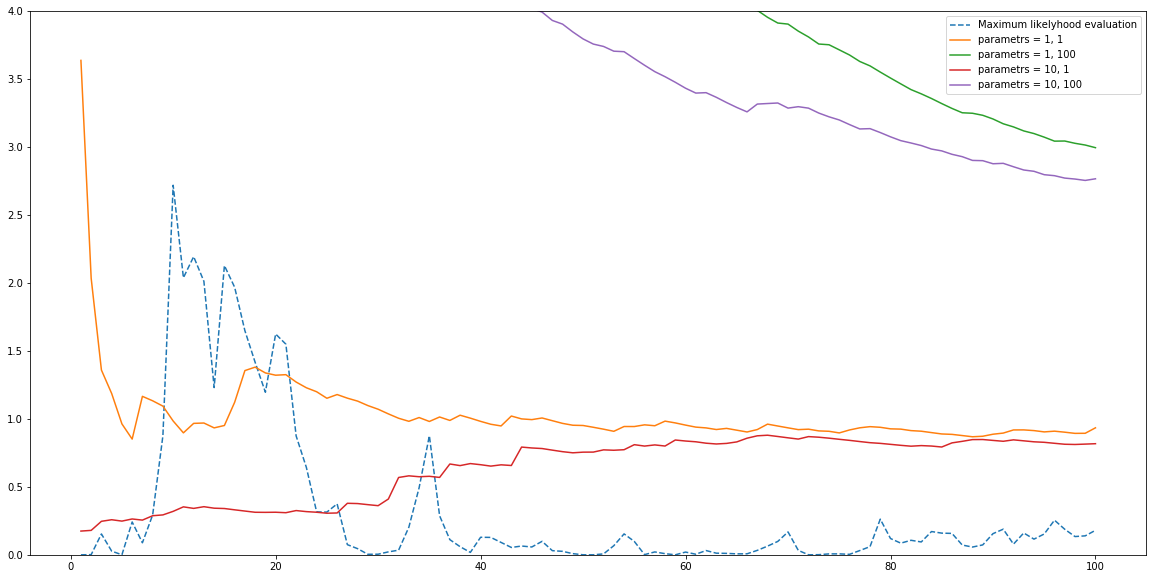

In [15]:
build_plots_new(sample_variance_evals, bayesian_evals_new)

Из графка видно, что оценки с параметрами (1, 100) и (10, 100) куда хуже, чем остальные оценки.